In [1]:
import pencil as pc
import numpy as np 
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict
import matplotlib.colors
from tqdm import tqdm
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.ndimage.filters import gaussian_filter
import time
import math
from matplotlib import cm
from matplotlib import colors
from IPython.display import clear_output
# ## plot parameters
mnras_column_size = 3.32153
mnras_text_size = 6.97522
golden_ratio = (1+np.sqrt(5))/2
plt.rc( ('axes'),labelsize=8)
plt.rc( ('xtick','ytick'),labelsize=7,direction ='in') 
plt.rc('xtick',top=True)
plt.rc('ytick',right=True) # ticks on both sides of the plots
plt.rc(("legend"),fontsize=7,frameon=False)
plt.rc(("figure"),dpi=300, 
       figsize=(mnras_column_size,mnras_column_size/golden_ratio))
matplotlib.rcParams.update({'font.size':7})
matplotlib.rcParams['lines.linewidth'] = 1 
border_width = 1
matplotlib.rcParams['ytick.major.width'] = border_width
matplotlib.rcParams['ytick.minor.width'] = border_width*0.8
matplotlib.rcParams['xtick.major.width'] = border_width
matplotlib.rcParams['xtick.minor.width'] = border_width*0.8
matplotlib.rcParams['axes.linewidth'] = border_width 
plt.rcParams.update({'font.size': 7})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['text.usetex'] = False
print('loaded')

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


/usr/local/lib/python3.10/dist-packages/matplotlib-3.9.1-py3.10-linux-x86_64.egg/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


$ conda install -c plotly plotly-orca psutil requests
loaded


/tmp/ipykernel_4327/737041155.py:13: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
import h5py

In [3]:
par=pc.read.param()

In [25]:
var=h5py.File('data/allprocs/VAR075.h5','r+')

In [26]:
cp = par.cp
gamma = par.gamma
cs20 = par.cs0 ** 2
lnrho0 = np.log(par.rho0)
lnTT0 = np.log(cs20 / (cp * (gamma - 1.0)))
lnTT = (
    lnTT0
    + gamma / cp * var['data/ss'][()]
    + (gamma - 1.0) * (np.log(var['data/rho']) - lnrho0)
)
tt=np.exp(lnTT)


Text(-3.5, 6, '$\\sigma_{SN}$=1.58\nR=6.5\n')

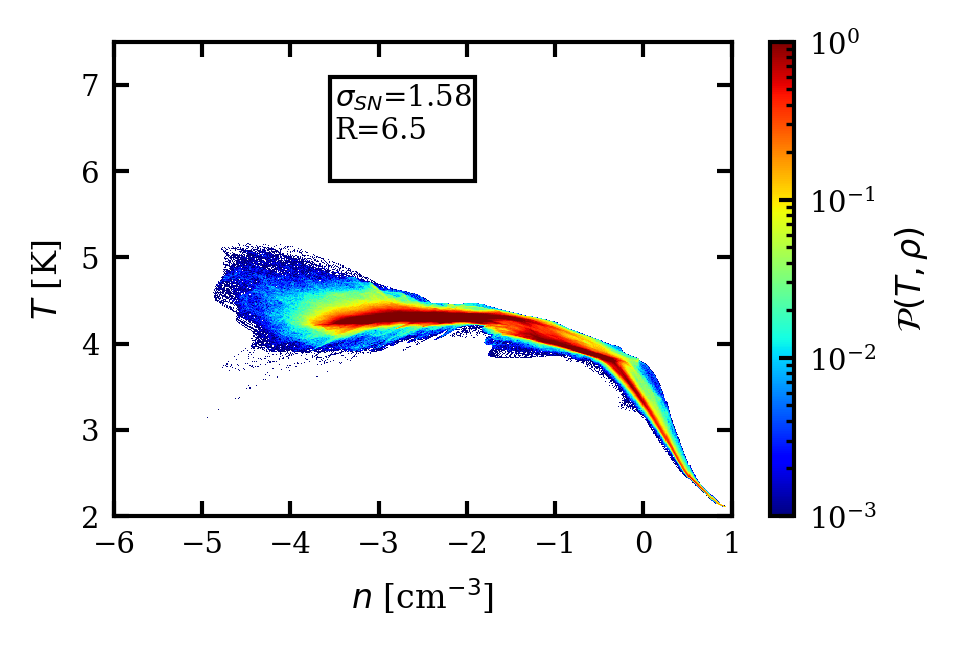

In [27]:
plt.hist2d(np.log10(var['data/rho']).ravel()
           ,np.log10(np.array(tt).ravel()*par.unit_temperature)
           ,bins=500
           ,norm=colors.LogNorm(vmin=1e-3,vmax=1)
           ,density=True
           ,cmap=cm.jet)
plt.xlim([-6,1])
plt.ylim([2,7.5])
plt.ylabel('$T$ [K]')
plt.xlabel(r'$n$ [cm$^{-3}$]')
plt.colorbar(label=r'$\mathcal{P}(T,\rho)$')
plt.text(-3.5,6,
         r'$\sigma_{SN}$='+f'{1.58}'+'\n'+
         r'R='+f'{6.5}'+'\n',
         # r'$h<|z|<3h$',
         bbox=dict(facecolor='none',pad=1))
# plt.close()


In [28]:
var=h5py.File('data/allprocs/VAR15.h5','r+')

In [29]:
cp = par.cp
gamma = par.gamma
cs20 = par.cs0 ** 2
lnrho0 = np.log(par.rho0)
lnTT0 = np.log(cs20 / (cp * (gamma - 1.0)))
lnTT = (
    lnTT0
    + gamma / cp * var['data/ss'][()]
    + (gamma - 1.0) * (np.log(var['data/rho']) - lnrho0)
)
tt=np.exp(lnTT)


Text(-3.5, 6, '$\\sigma_{SN}$=0.07\nR=10\n')

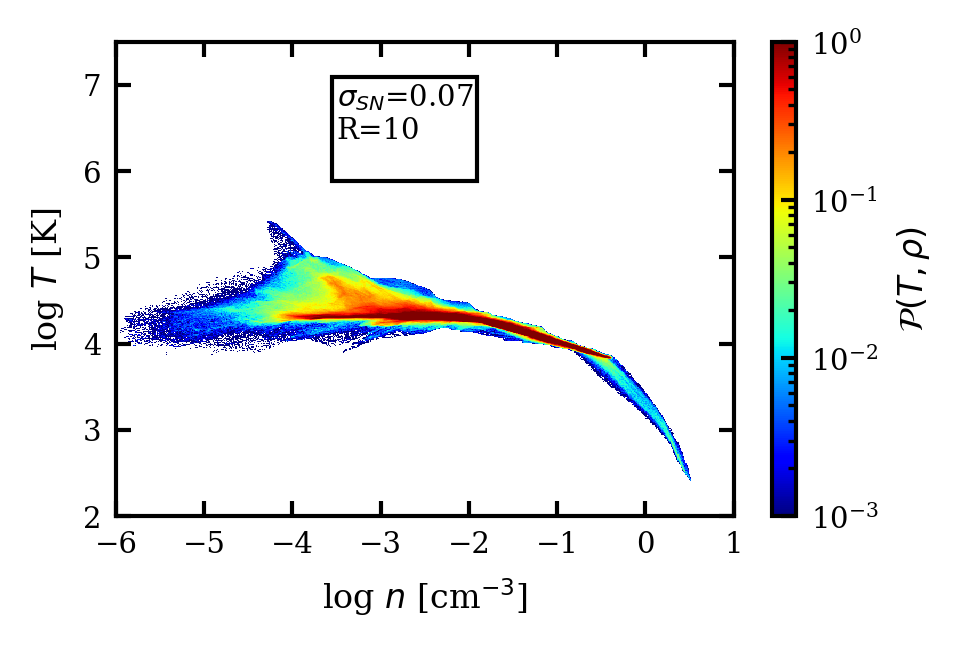

In [32]:
plt.hist2d(np.log10(var['data/rho']).ravel()
           ,np.log10(np.array(tt).ravel()*par.unit_temperature)
           ,bins=500
           ,norm=colors.LogNorm(vmin=1e-3,vmax=1)
           ,density=True
           ,cmap=cm.jet)
plt.xlim([-6,1])
plt.ylim([2,7.5])
plt.ylabel('log $ T$ [K]')
plt.xlabel(r'log $ n$ [cm$^{-3}$]')
plt.colorbar(label=r'$\mathcal{P}(T,\rho)$')
plt.text(-3.5,6,
         r'$\sigma_{SN}$='+f'{0.07}'+'\n'+
         r'$R$='+f'{10}'+'\n',
         # r'$h<|z|<3h$',
         bbox=dict(facecolor='none',pad=1))
# plt.close()


In [35]:
rho=np.array(var['data/rho'][()])

In [48]:
np.where(rho==rho.max())

(array([383]), array([8]), array([188]))

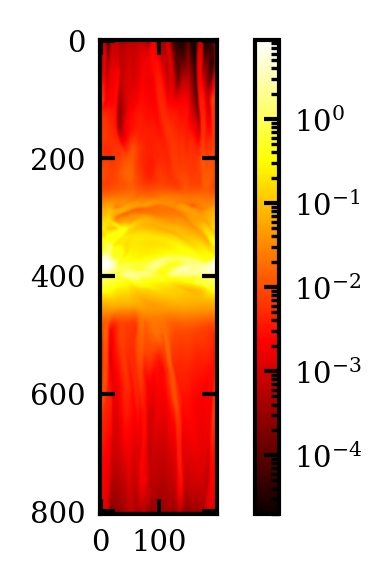

In [53]:
plt.imshow(var['data/rho'][()][:,:,188],cmap=cm.hot,norm=colors.LogNorm())
plt.colorbar()

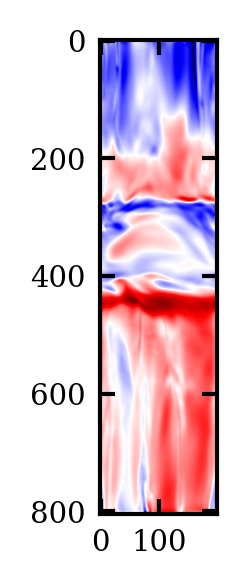

In [52]:
plt.imshow(var['data/ux'][()][:,:,188],cmap=cm.seismic,norm=colors.SymLogNorm(20))